In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

data= pd.read_csv('data_regression.csv')

In [2]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,density
0,0.23,5,6,2,61.5,55,326,3.95,3.98,2.43,38.202030,0.006021
1,0.21,4,6,3,59.8,61,326,3.89,3.84,2.31,34.505856,0.006086
2,0.23,2,6,5,56.9,65,327,4.05,4.07,2.31,38.076885,0.006040
3,0.29,4,2,4,62.4,58,334,4.20,4.23,2.63,46.724580,0.006207
4,0.31,2,1,2,63.3,58,335,4.34,4.35,2.75,51.917250,0.005971
...,...,...,...,...,...,...,...,...,...,...,...,...
51899,0.72,5,7,3,60.8,57,2757,5.75,5.76,3.50,115.920000,0.006211
51900,0.72,2,7,3,63.1,55,2757,5.69,5.75,3.61,118.110175,0.006096
51901,0.70,3,7,3,62.8,60,2757,5.66,5.68,3.56,114.449728,0.006116
51902,0.86,4,3,2,61.0,58,2757,6.15,6.12,3.74,140.766120,0.006109


Выделение целевого признака и предикторов

In [3]:
y = data["price"]
x = data.drop(["price"], axis=1)

In [4]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
51899    2757
51900    2757
51901    2757
51902    2757
51903    2757
Name: price, Length: 51904, dtype: int64

In [5]:
x

,carat,cut,color,clarity,depth,table,x,y,z,volume,density
0,0.23,5,6,2,61.5,55,3.95,3.98,2.43,38.202030,0.006021
1,0.21,4,6,3,59.8,61,3.89,3.84,2.31,34.505856,0.006086
2,0.23,2,6,5,56.9,65,4.05,4.07,2.31,38.076885,0.006040
3,0.29,4,2,4,62.4,58,4.20,4.23,2.63,46.724580,0.006207
4,0.31,2,1,2,63.3,58,4.34,4.35,2.75,51.917250,0.005971
...,...,...,...,...,...,...,...,...,...,...,...
51899,0.72,5,7,3,60.8,57,5.75,5.76,3.50,115.920000,0.006211
51900,0.72,2,7,3,63.1,55,5.69,5.75,3.61,118.110175,0.006096
51901,0.70,3,7,3,62.8,60,5.66,5.68,3.56,114.449728,0.006116
51902,0.86,4,3,2,61.0,58,6.15,6.12,3.74,140.766120,0.006109


Делим данные на обучающую и тестовую выборки (80 на 20)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((41523, 11), (41523,), (10381, 11), (10381,))

Решаем задачи регрессии

Для оценки качетсва моделей регрессии применяются следующие метрики:
- средняя абсолютная ошибка (Mean Absolute Error, MAE);
- средняя квадратичная ошибка (Mean Squared Error, MSE);
- квадратный корень из средней квадратичной ошибки (Root Mean Squared Error);
- средняя абсолютная ошибка в процентах (Mean Absolute Percentage Error, MAPE);
- коэффициент детерминации ($R^2$).

Обучение модели

Множественная линейная регрессия

Подбираем гиперпараметры

GridSearchCV

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

In [9]:
ridge = Ridge()
lasso= Lasso()

In [10]:
param = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 1000]}
# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(ridge, param, cv=5)
grid_search.fit(x_train, y_train)
print(f"Лучший параметр alpha: {grid_search.best_params_}")

#grid_search = GridSearchCV(lasso, param, cv=5)
#grid_search.fit(x_train, y_train)
#print(f"Лучший параметр alpha: {grid_search.best_params_}")

Лучший параметр alpha: {'alpha': 0.1}


GridSearchCV подобрал alpha: 0.1 для ridge
GridSearchCV не работает с lasso (?)

In [11]:
ridge_optimal = RandomizedSearchCV(ridge, param, cv=5)

ridge_optimal.fit(x_train, y_train)

print(f"Лучший параметр alpha для ridge: {ridge_optimal.best_params_}")

#lasso_optimal = RandomizedSearchCV(lasso, param, cv=5)

#lasso_optimal.fit(x_train, y_train)

#print(f"Лучший параметр alpha: {lasso_optimal.best_params_}")

Лучший параметр alpha для ridge: {'alpha': 0.1}


RandomizedSearchCV подобрал alpha: 0.1 для ridge
RandomizedSearchCV не работает с lasso (?) при таком датасете (возможно из-за столбца density) (удаление этого столбца не помогло)

In [12]:
import optuna
def objective(trial):
    # Подбор параметра alpha с помощью optuna (логарифмический диапазон)
    alpha = trial.suggest_float('alpha', 0, 10)

    # Создание модели Ridge с найденным параметром alpha
    model = Ridge(alpha=alpha)

    # Обучение модели
    model.fit(x_train, y_train)

    # Прогнозирование на тестовых данных
    y_pred = model.predict(x_test)

    # Оценка модели по MSE (средняя квадратичная ошибка)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Создание и запуск оптимизации с помощью optuna
study = optuna.create_study(direction='minimize')  # минимизируем MSE
study.optimize(objective, n_trials=50)  # Количество испытаний

# Вывод лучших гиперпараметров
print(f'Лучший параметр alpha: {study.best_params["alpha"]}')

def objective(trial):
    # Подбор параметра alpha с помощью optuna (логарифмический диапазон)
    alpha = trial.suggest_float('alpha', 0, 10)

    # Создание модели Ridge с найденным параметром alpha
    model = Lasso(alpha=alpha)

    # Обучение модели
    model.fit(x_train, y_train)

    # Прогнозирование на тестовых данных
    y_pred = model.predict(x_test)

    # Оценка модели по MSE (средняя квадратичная ошибка)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Создание и запуск оптимизации с помощью optuna
study = optuna.create_study(direction='minimize')  # минимизируем MSE
study.optimize(objective, n_trials=20)  # Количество испытаний

# Вывод лучших гиперпараметров
print(f'Лучший параметр alpha: {study.best_params["alpha"]}')

[I 2025-05-25 16:17:42,541] A new study created in memory with name: no-name-4fdb1c3a-9903-4960-acf4-3689966f85fa
[I 2025-05-25 16:17:42,549] Trial 0 finished with value: 1061683.9487562904 and parameters: {'alpha': 9.105039091176295}. Best is trial 0 with value: 1061683.9487562904.
[I 2025-05-25 16:17:42,557] Trial 1 finished with value: 1061147.8581442963 and parameters: {'alpha': 4.646895975012689}. Best is trial 1 with value: 1061147.8581442963.
[I 2025-05-25 16:17:42,565] Trial 2 finished with value: 1061486.8511713243 and parameters: {'alpha': 7.452666980967747}. Best is trial 1 with value: 1061147.8581442963.
[I 2025-05-25 16:17:42,572] Trial 3 finished with value: 1060729.2668456614 and parameters: {'alpha': 0.6431779382566682}. Best is trial 3 with value: 1060729.2668456614.
[I 2025-05-25 16:17:42,580] Trial 4 finished with value: 1061768.6033908043 and parameters: {'alpha': 9.828051467273859}. Best is trial 3 with value: 1060729.2668456614.
[I 2025-05-25 16:17:42,587] Trial 5

Лучший параметр alpha: 0.007398444888472508


[I 2025-05-25 16:17:43,649] Trial 0 finished with value: 1068550.6541301291 and parameters: {'alpha': 7.486264389676288}. Best is trial 0 with value: 1068550.6541301291.
[I 2025-05-25 16:17:44,111] Trial 1 finished with value: 1067139.3059275618 and parameters: {'alpha': 4.941282513248261}. Best is trial 1 with value: 1067139.3059275618.
[I 2025-05-25 16:17:44,307] Trial 2 finished with value: 1070969.9874376534 and parameters: {'alpha': 9.795256801738283}. Best is trial 1 with value: 1067139.3059275618.
[I 2025-05-25 16:17:44,898] Trial 3 finished with value: 1068473.4126026086 and parameters: {'alpha': 7.420336487615913}. Best is trial 1 with value: 1067139.3059275618.
[I 2025-05-25 16:17:45,367] Trial 4 finished with value: 1067142.500201774 and parameters: {'alpha': 4.944210364914329}. Best is trial 1 with value: 1067139.3059275618.
F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might 

Лучший параметр alpha: 0.017558930029431874


Optuna
Лучший параметр alpha ridge: 0.02101568833699639
Лучший параметр alpha lasso: 0.07439416419734021

In [13]:
lr = LinearRegression().fit(x_train, y_train)

Предсказание

In [14]:
lr.predict(x_test)

array([  210.53103689,  7673.95257394, -1861.75012573, ...,
        8779.5778408 ,  2751.92047148,  9151.4761899 ])

In [15]:
y_pred = lr.predict(x_test)

In [16]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(x_test, y_test)}')

MAE: 699.8076867564993
MSE: 1058317.3215636725
RMSE: 1028.7455086481168
MAPE: 0.6362554308762783
R^2: 0.9040824014285207


In [17]:
len(lr.coef_)
lr.coef_

array([-9.61208733e+03,  9.10309736e+01,  3.25732863e+02,  4.66503384e+02,
       -2.22273837e+01, -1.24341329e+01, -2.37178586e+03,  4.41084443e+02,
       -7.99077734e+02,  1.50247159e+02,  1.94629067e+06])

Регуляризация

In [18]:
ridge = Ridge(alpha=0.02).fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(x_test, y_test)}')
ridge.coef_

MAE: 702.8208188325472
MSE: 1060614.8130743774
RMSE: 1029.8615504398526
MAPE: 0.6378417861357124
R^2: 0.903874174780468


array([ 3.28776439e+03,  9.39285991e+01,  3.25520914e+02,  4.65996347e+02,
        1.22107060e+02, -3.90158515e+00, -1.44455079e+03,  1.07073795e+03,
       -3.08539759e+03,  6.90116449e+01,  1.20926643e+04])

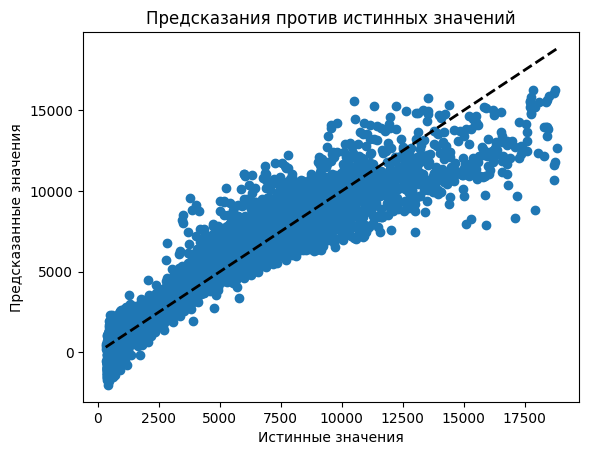

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания против истинных значений')
plt.show()

In [20]:
lasso = Lasso(alpha=0.1).fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(x_test, y_test)}')
lasso.coef_

MAE: 702.915406348176
MSE: 1061230.6561151564
RMSE: 1030.1605001722578
MAPE: 0.6383297976211808
R^2: 0.9038183595874585


F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.728e+10, tolerance: 4.910e+07
  model = cd_fast.enet_coordinate_descent(


array([ 3934.51721602,    93.44985244,   325.41322417,   467.00313775,
         100.34607368,    -6.5586541 , -1364.33317102,   825.39939841,
       -2779.10501521,    64.64820545,     0.        ])

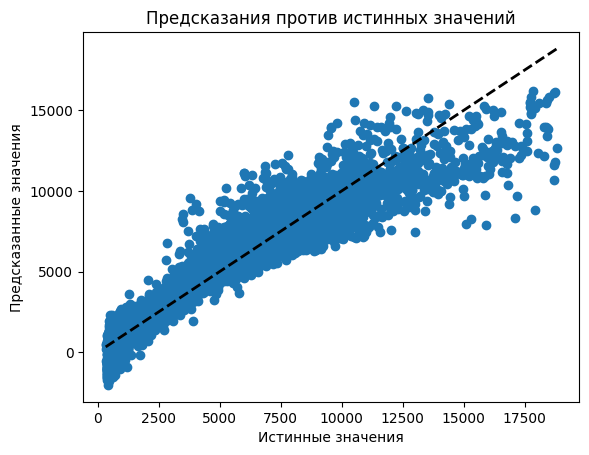

In [21]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания против истинных значений')
plt.show()

In [22]:
elastic_net = ElasticNet() 
param = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 1000]}

grid_search = GridSearchCV(elastic_net, param, cv=5)
grid_search.fit(x_train, y_train)

print(f"Лучший параметр alpha: {grid_search.best_params_}")

lasso_optimal = RandomizedSearchCV(elastic_net, param, cv=5)

lasso_optimal.fit(x_train, y_train)

print(f"Лучший параметр alpha: {lasso_optimal.best_params_}")

Лучший параметр alpha: {'alpha': 0.1}
Лучший параметр alpha: {'alpha': 0.1}


In [23]:
def objective(trial):
    # Подбор параметра alpha с помощью optuna (логарифмический диапазон)
    alpha = trial.suggest_float('alpha', 0, 10)

    # Создание модели Ridge с найденным параметром alpha
    model = ElasticNet(alpha=alpha)

    # Обучение модели
    model.fit(x_train, y_train)

    # Прогнозирование на тестовых данных
    y_pred = model.predict(x_test)

    # Оценка модели по MSE (средняя квадратичная ошибка)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Создание и запуск оптимизации с помощью optuna
study = optuna.create_study(direction='minimize')  # минимизируем MSE
study.optimize(objective, n_trials=50)  # Количество испытаний

# Вывод лучших гиперпараметров
print(f'Лучший параметр alpha: {study.best_params["alpha"]}')

[I 2025-05-25 16:18:03,894] A new study created in memory with name: no-name-34515fb1-62ee-405f-a331-58066956c8a7
[I 2025-05-25 16:18:03,911] Trial 0 finished with value: 1521209.1355022504 and parameters: {'alpha': 9.336569632452052}. Best is trial 0 with value: 1521209.1355022504.
[I 2025-05-25 16:18:03,933] Trial 1 finished with value: 1297421.579838378 and parameters: {'alpha': 3.1750726125487425}. Best is trial 1 with value: 1297421.579838378.
[I 2025-05-25 16:18:03,971] Trial 2 finished with value: 1172258.797936575 and parameters: {'alpha': 0.8989913400306382}. Best is trial 2 with value: 1172258.797936575.
[I 2025-05-25 16:18:03,989] Trial 3 finished with value: 1345940.179501855 and parameters: {'alpha': 4.1853692910549025}. Best is trial 2 with value: 1172258.797936575.
[I 2025-05-25 16:18:04,006] Trial 4 finished with value: 1456714.5318101973 and parameters: {'alpha': 7.063579698249579}. Best is trial 2 with value: 1172258.797936575.
[I 2025-05-25 16:18:04,023] Trial 5 fini

Лучший параметр alpha: 0.008074957721584168


In [24]:
from sklearn.metrics import r2_score

In [25]:
elastic_net = ElasticNet(alpha=0.1).fit(x_train, y_train)
y_pred = elastic_net.predict(x_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {r2_score(y_test, y_pred)}')

MAE: 723.4372444961772
MSE: 1088453.8100913304
RMSE: 1043.28989743567
MAPE: 0.6536187980635928
R^2: 0.9013510659868226


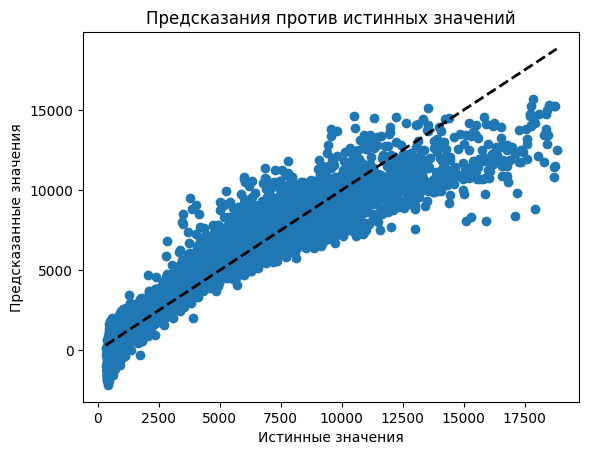

In [26]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания против истинных значений')
plt.show()

Простая линейная регрессия

In [27]:
linreg = LinearRegression() 

In [28]:
X = data.drop(["cut", "color", "clarity","depth", "table", "price", "x", "y", "z", "volume", "density"], axis = 1)
Y = data["price"]
data.info()
#y = data["price"]
#x = data.drop(["price"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51904 entries, 0 to 51903
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    51904 non-null  float64
 1   cut      51904 non-null  int64  
 2   color    51904 non-null  int64  
 3   clarity  51904 non-null  int64  
 4   depth    51904 non-null  float64
 5   table    51904 non-null  int64  
 6   price    51904 non-null  int64  
 7   x        51904 non-null  float64
 8   y        51904 non-null  float64
 9   z        51904 non-null  float64
 10  volume   51904 non-null  float64
 11  density  51904 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 4.8 MB


In [29]:
X

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31
...,...
51899,0.72
51900,0.72
51901,0.70
51902,0.86


In [30]:
Y

0         326
1         326
2         327
3         334
4         335
         ... 
51899    2757
51900    2757
51901    2757
51902    2757
51903    2757
Name: price, Length: 51904, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [32]:
X_scal = StandardScaler().fit_transform(X)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scal, Y, test_size = 0.2, random_state=42)

In [34]:
linreg=linreg.fit(X_train, Y_train)

In [35]:
Y_pred = linreg.predict(X_test)

In [36]:
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Y_test, Y_pred))}')
print(f'R^2: {linreg.score(X_test, Y_test)}')

MAE: 938.9344271216052
MSE: 2028381.2597856992
RMSE: 1424.2125051359783
MAPE: 0.620590247308421
R^2: 0.822910739121151


In [37]:
ridge = Ridge()
lasso= Lasso()

In [38]:
param = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 1000]}
# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(ridge, param, cv=5)
grid_search.fit(X_train, Y_train)

# Лучшие параметры
print(f"Лучший параметр alpha: {grid_search.best_params_}")

grid_search = GridSearchCV(lasso, param, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Лучший параметр alpha: {grid_search.best_params_}")

Лучший параметр alpha: {'alpha': 10}
Лучший параметр alpha: {'alpha': 0.7}


GridSearchCV подобрал лучшие параметры для ridge и lasso: 1 и 10 соответсвенно

In [39]:
ridge_optimal = RandomizedSearchCV(ridge, param, cv=5)

ridge_optimal.fit(X_train, Y_train)

print(f"Лучший параметр alpha: {ridge_optimal.best_params_}")

lasso_optimal = RandomizedSearchCV(lasso, param, cv=5)

lasso_optimal.fit(X_train, Y_train)

print(f"Лучший параметр alpha: {lasso_optimal.best_params_}")

Лучший параметр alpha: {'alpha': 10}
Лучший параметр alpha: {'alpha': 0.7}


RandomizedSearchCV подобрал лучшие параметры для ridge и lasso: 1 и 10 соответсвенно

In [40]:
elastic_net = ElasticNet() 
param = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 100, 1000]}

grid_search = GridSearchCV(elastic_net, param, cv=5)
grid_search.fit(X_train, Y_train)

print(f"Лучший параметр alpha: {grid_search.best_params_}")

lasso_optimal = RandomizedSearchCV(elastic_net, param, cv=5)

lasso_optimal.fit(X_train, Y_train)

print(f"Лучший параметр alpha: {lasso_optimal.best_params_}")

Лучший параметр alpha: {'alpha': 0.1}
Лучший параметр alpha: {'alpha': 0.1}


GridSearch и RandomizedSearchCVRandomizedSearchCV подобрали лучшие параметры для elastic_net: 0.1 

In [41]:
def objective(trial):
    # Подбор параметра alpha с помощью optuna (логарифмический диапазон)
    alpha = trial.suggest_float('alpha', 0, 10)

    # Создание модели Ridge с найденным параметром alpha
    model = Ridge(alpha=alpha)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Прогнозирование на тестовых данных
    y_pred = model.predict(X_test)

    # Оценка модели по MSE (средняя квадратичная ошибка)
    mse = mean_squared_error(Y_test, Y_pred)
    return mse

# Создание и запуск оптимизации с помощью optuna
study = optuna.create_study(direction='minimize')  # минимизируем MSE
study.optimize(objective, n_trials=50)  # Количество испытаний

# Вывод лучших гиперпараметров
print(f'Лучший параметр alpha: {study.best_params["alpha"]}')

def objective(trial):
    # Подбор параметра alpha с помощью optuna (логарифмический диапазон)
    alpha = trial.suggest_float('alpha', 0, 10)

    # Создание модели Ridge с найденным параметром alpha
    model = Lasso(alpha=alpha)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Прогнозирование на тестовых данных
    y_pred = model.predict(X_test)

    # Оценка модели по MSE (средняя квадратичная ошибка)
    mse = mean_squared_error(Y_test, Y_pred)
    return mse

# Создание и запуск оптимизации с помощью optuna
study = optuna.create_study(direction='minimize')  # минимизируем MSE
study.optimize(objective, n_trials=50)  # Количество испытаний

# Вывод лучших гиперпараметров
print(f'Лучший параметр alpha: {study.best_params["alpha"]}')

[I 2025-05-25 16:18:10,795] A new study created in memory with name: no-name-65281d80-d295-46fa-aaf9-dcc4264064f7
[I 2025-05-25 16:18:10,798] Trial 0 finished with value: 2028381.2597856992 and parameters: {'alpha': 1.419044979339138}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:10,801] Trial 1 finished with value: 2028381.2597856992 and parameters: {'alpha': 5.0178995352261975}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:10,803] Trial 2 finished with value: 2028381.2597856992 and parameters: {'alpha': 8.404163602785985}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:10,806] Trial 3 finished with value: 2028381.2597856992 and parameters: {'alpha': 6.292653809045889}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:10,808] Trial 4 finished with value: 2028381.2597856992 and parameters: {'alpha': 1.0413454850254766}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:10,810] Trial 

Лучший параметр alpha: 1.419044979339138


[I 2025-05-25 16:18:11,242] Trial 33 finished with value: 2028381.2597856992 and parameters: {'alpha': 8.921376988220846}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,249] Trial 34 finished with value: 2028381.2597856992 and parameters: {'alpha': 7.625638706008351}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,255] Trial 35 finished with value: 2028381.2597856992 and parameters: {'alpha': 4.369237388150788}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,261] Trial 36 finished with value: 2028381.2597856992 and parameters: {'alpha': 3.5110766430765077}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,269] Trial 37 finished with value: 2028381.2597856992 and parameters: {'alpha': 5.08871167227057}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,276] Trial 38 finished with value: 2028381.2597856992 and parameters: {'alpha': 6.012618910963543}. Best is trial 0 with v

Лучший параметр alpha: 4.289610921046507


Optuna
Лучший параметр alpha ridge: 7.429203681553293
Лучший параметр alpha lasso: 6.011942439627889

In [42]:
def objective(trial):
    # Подбор параметра alpha с помощью optuna (логарифмический диапазон)
    alpha = trial.suggest_float('alpha', 0, 10)

    # Создание модели Ridge с найденным параметром alpha
    model = ElasticNet(alpha=alpha)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Прогнозирование на тестовых данных
    y_pred = model.predict(X_test)

    # Оценка модели по MSE (средняя квадратичная ошибка)
    mse = mean_squared_error(Y_test, Y_pred)
    return mse

# Создание и запуск оптимизации с помощью optuna
study = optuna.create_study(direction='minimize')  # минимизируем MSE
study.optimize(objective, n_trials=50)  # Количество испытаний

# Вывод лучших гиперпараметров
print(f'Лучший параметр alpha: {study.best_params["alpha"]}')

[I 2025-05-25 16:18:11,361] A new study created in memory with name: no-name-e873ec47-d3b4-4d28-808e-aa24071424fb
[I 2025-05-25 16:18:11,366] Trial 0 finished with value: 2028381.2597856992 and parameters: {'alpha': 8.68037084859952}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,369] Trial 1 finished with value: 2028381.2597856992 and parameters: {'alpha': 2.0045025634413607}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,371] Trial 2 finished with value: 2028381.2597856992 and parameters: {'alpha': 6.119055210209577}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,374] Trial 3 finished with value: 2028381.2597856992 and parameters: {'alpha': 2.08361955977596}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,377] Trial 4 finished with value: 2028381.2597856992 and parameters: {'alpha': 5.1867890363025895}. Best is trial 0 with value: 2028381.2597856992.
[I 2025-05-25 16:18:11,380] Trial 5 

Лучший параметр alpha: 8.68037084859952


Регуляризация

In [43]:
ridge = Ridge(alpha=1).fit(X_train, Y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'MSE: {mean_squared_error(Y_test,Y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Y_test, Y_pred))}')
print(f'R^2: {ridge.score(X_test, Y_test)}')
ridge.coef_

MAE: 938.9344271216052
MSE: 2028381.2597856992
RMSE: 1424.2125051359783
MAPE: 0.620590247308421
R^2: 0.8229111971701103


array([3099.1770137])

In [44]:
lasso = Lasso(alpha=10).fit(X_train, Y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Y_test, Y_pred))}')
print(f'R^2: {lasso.score(X_test, Y_test)}')
lasso.coef_

MAE: 938.9344271216052
MSE: 2028381.2597856992
RMSE: 1424.2125051359783
MAPE: 0.620590247308421
R^2: 0.8229633910990706


array([3089.24166776])

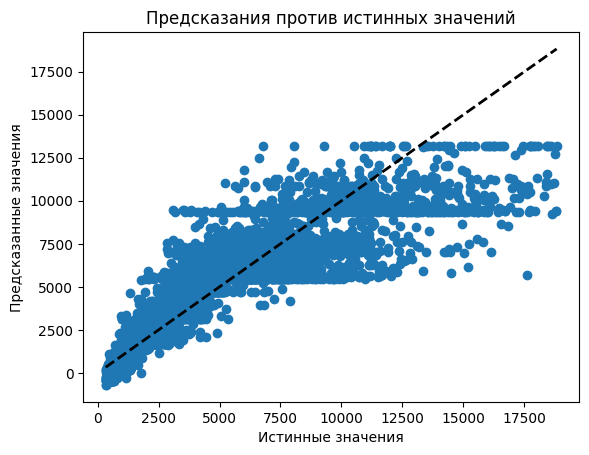

In [45]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания против истинных значений')
plt.show()

In [46]:
elastic_net = ElasticNet(alpha=0.1).fit(X_train, Y_train)
y_pred = elastic_net.predict(X_test)
print(f'MAE: {mean_absolute_error(Y_test, Y_pred)}')
print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(Y_test, Y_pred))}')
print(f'R^2: {r2_score(Y_test, Y_pred)}')

MAE: 938.9344271216052
MSE: 2028381.2597856992
RMSE: 1424.2125051359783
MAPE: 0.620590247308421
R^2: 0.822910739121151


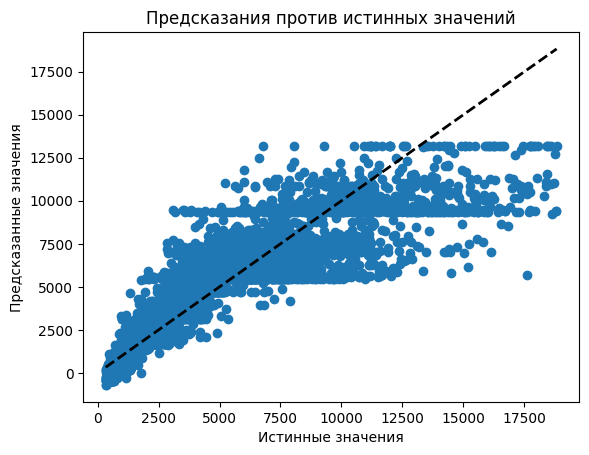

In [47]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания против истинных значений')
plt.show()

Полиномиальная регрессия

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
degree = 2  # Степень полинома
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly, y_train)

LinearRegression()

In [50]:
x_test_poly = poly.transform(x_test)
y_pred = model.predict(x_test_poly)

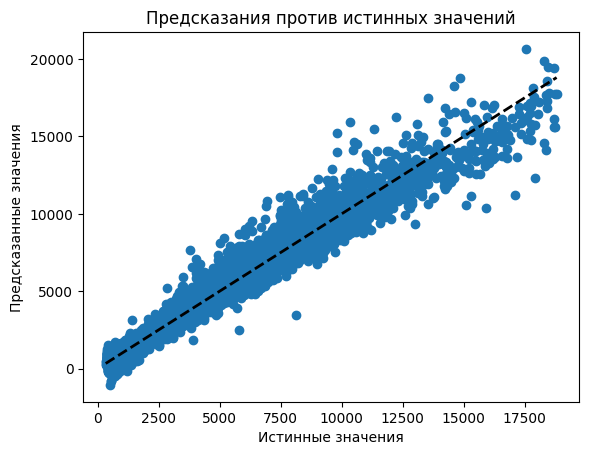

In [51]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания против истинных значений')
plt.show()

In [52]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R²: {r2}')

MAE: 374.06476235125996
MSE: 348190.3852659841
RMSE: 590.0765927114751
MAPE: 0.4160808642287849
R²: 0.9684427487674054


In [53]:
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),  # Шаг 1: Преобразование признаков
    ('regressor', LinearRegression())  # Шаг 2: Обучение линейной регрессии
])

# Обучение модели
model.fit(x_train, y_train)

Y_test_pred = model.predict(x_test)

mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)

print(f'MAE: {mean_absolute_error(y_test, Y_test_pred)}')
print(f'MSE: {mean_squared_error(y_test, Y_test_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, Y_test_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, Y_test_pred))}')
print(f'R²: {r2}')

MAE: 374.06476235125996
MSE: 348190.3852659841
RMSE: 590.0765927114751
MAPE: 0.4160808642287849
R²: 0.9684427487674054


In [54]:
import metricks

print(metricks.custom_r2(y_test, y_pred))

print(metricks.custom_mae(y_test, y_pred))

print(metricks.custom_mse(y_test, y_pred))

print(metricks.custom_rmse(y_test, y_pred))

print(metricks.custom_mape(y_test, y_pred))

0.9684427487674054
374.06476235125996
348190.3852659841
590.0765927114751
17.312328557737253


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

results_train_sklearn = []
results_train_custom = []

models = {
    'Multiple Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.1),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1)
}

# Оценка моделей
for name, model in models.items():
    model.fit(x_train, y_train)
    
    # Предсказания на обучающих и тестовых данных
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Scikit-learn метрики
    r2_train_sklearn = r2_score(y_train, y_train_pred)
    mse_train_sklearn = mean_squared_error(y_train, y_train_pred)
    rmse_train_sklearn_val = rmse(y_train, y_train_pred)
    mae_train_sklearn = mean_absolute_error(y_train, y_train_pred)
    mape_train_sklearn_val = mape(y_train, y_train_pred)

    r2_test_sklearn = r2_score(y_test, y_test_pred)
    mse_test_sklearn = mean_squared_error(y_test, y_test_pred)
    rmse_test_sklearn_val = rmse(y_test, y_test_pred)
    mae_test_sklearn = mean_absolute_error(y_test, y_test_pred)
    mape_test_sklearn_val = mape(y_test, y_test_pred)

    # Кастомные функции метрики
    r2_train_custom = metricks.custom_r2(y_train, y_train_pred)
    mse_train_custom = metricks.custom_mse(y_train, y_train_pred)
    rmse_train_custom = metricks.custom_rmse(y_train, y_train_pred)
    mae_train_custom = metricks.custom_mae(y_train, y_train_pred)
    mape_train_custom = metricks.custom_mape(y_train, y_train_pred)

    r2_test_custom = metricks.custom_r2(y_test, y_test_pred)
    mse_test_custom = metricks.custom_mse(y_test, y_test_pred)
    rmse_test_custom = metricks.custom_rmse(y_test, y_test_pred)
    mae_test_custom = metricks.custom_mae(y_test, y_test_pred)
    mape_test_custom = metricks.custom_mape(y_test, y_test_pred)
    
    # Добавляем в списки результаты
    results_train_sklearn.append([name, r2_train_sklearn, mse_train_sklearn, rmse_train_sklearn_val, mae_train_sklearn, mape_train_sklearn_val, 
                                 r2_test_sklearn, mse_test_sklearn, rmse_test_sklearn_val, mae_test_sklearn, mape_test_sklearn_val])
    results_train_custom.append([name, r2_train_custom, mse_train_custom, rmse_train_custom, mae_train_custom, mape_train_custom,
                                r2_test_custom, mse_test_custom, rmse_test_custom, mae_test_custom, mape_test_custom])

models = {
    'Simple  Linear Regression': LinearRegression(),
    'Simple Ridge Regression': Ridge(alpha=1),
    'Simple Lasso Regression': Lasso(alpha=10),
    'Simple Elastic Net': ElasticNet(alpha=0.1)
}

# Оценка моделей
for name, model in models.items():
    model.fit(X_train, Y_train)
    
    # Предсказания на обучающих и тестовых данных
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Scikit-learn метрики
    r2_train_sklearn = r2_score(Y_train, Y_train_pred)
    mse_train_sklearn = mean_squared_error(Y_train, Y_train_pred)
    rmse_train_sklearn_val = rmse(Y_train, Y_train_pred)
    mae_train_sklearn = mean_absolute_error(Y_train, Y_train_pred)
    mape_train_sklearn_val = mape(Y_train, Y_train_pred)

    r2_test_sklearn = r2_score(Y_test, Y_test_pred)
    mse_test_sklearn = mean_squared_error(Y_test, Y_test_pred)
    rmse_test_sklearn_val = rmse(Y_test, Y_test_pred)
    mae_test_sklearn = mean_absolute_error(Y_test, Y_test_pred)
    mape_test_sklearn_val = mape(Y_test, Y_test_pred)

    # Кастомные функции метрики
    r2_train_custom = metricks.custom_r2(Y_train, Y_train_pred)
    mse_train_custom = metricks.custom_mse(Y_train, Y_train_pred)
    rmse_train_custom = metricks.custom_rmse(Y_train, Y_train_pred)
    mae_train_custom = metricks.custom_mae(Y_train, Y_train_pred)
    mape_train_custom = metricks.custom_mape(Y_train, Y_train_pred)

    r2_test_custom = metricks.custom_r2(Y_test, Y_test_pred)
    mse_test_custom = metricks.custom_mse(Y_test, Y_test_pred)
    rmse_test_custom = metricks.custom_rmse(Y_test, Y_test_pred)
    mae_test_custom = metricks.custom_mae(Y_test, Y_test_pred)
    mape_test_custom = metricks.custom_mape(Y_test, Y_test_pred)
    
    # Добавляем в списки результаты
    results_train_sklearn.append([name, r2_train_sklearn, mse_train_sklearn, rmse_train_sklearn_val, mae_train_sklearn, mape_train_sklearn_val, 
                                 r2_test_sklearn, mse_test_sklearn, rmse_test_sklearn_val, mae_test_sklearn, mape_test_sklearn_val])
    results_train_custom.append([name, r2_train_custom, mse_train_custom, rmse_train_custom, mae_train_custom, mape_train_custom,
                                r2_test_custom, mse_test_custom, rmse_test_custom, mae_test_custom, mape_test_custom])

models = []

models = {
    'Polynomial regression 2': PolynomialFeatures(2),
    'Polynomial regression 3': PolynomialFeatures(3),
    'Polynomial regression 4': PolynomialFeatures(4)
}

# Оценка моделей
for name, model in models.items():
    x_poly = model.fit_transform(x_train)
    x_train_poly = model.transform(x_train)
    x_test_poly = model.transform(x_test)
    model1=LinearRegression()
    model1.fit(x_poly, y_train)
    
    # Предсказания на обучающих и тестовых данных
    Y_train_pred = model1.predict(x_train_poly)
    Y_test_pred = model1.predict(x_test_poly)
    
    # Scikit-learn метрики
    r2_train_sklearn = r2_score(y_train, Y_train_pred)
    mse_train_sklearn = mean_squared_error(y_train, Y_train_pred)
    rmse_train_sklearn_val = rmse(y_train, Y_train_pred)
    mae_train_sklearn = mean_absolute_error(y_train, Y_train_pred)
    mape_train_sklearn_val = mape(y_train, Y_train_pred)

    r2_test_sklearn = r2_score(y_test, Y_test_pred)
    mse_test_sklearn = mean_squared_error(y_test, Y_test_pred)
    rmse_test_sklearn_val = rmse(y_test, Y_test_pred)
    mae_test_sklearn = mean_absolute_error(y_test, Y_test_pred)
    mape_test_sklearn_val = mape(y_test, Y_test_pred)

    # Кастомные функции метрики
    r2_train_custom = metricks.custom_r2(y_train, Y_train_pred)
    mse_train_custom = metricks.custom_mse(y_train, Y_train_pred)
    rmse_train_custom = metricks.custom_rmse(y_train, Y_train_pred)
    mae_train_custom = metricks.custom_mae(y_train, Y_train_pred)
    mape_train_custom = metricks.custom_mape(y_train, Y_train_pred)

    r2_test_custom = metricks.custom_r2(y_test, Y_test_pred)
    mse_test_custom = metricks.custom_mse(y_test, Y_test_pred)
    rmse_test_custom = metricks.custom_rmse(y_test, Y_test_pred)
    mae_test_custom = metricks.custom_mae(y_test, Y_test_pred)
    mape_test_custom = metricks.custom_mape(y_test, Y_test_pred)
    
    # Добавляем в списки результаты
    results_train_sklearn.append([name, r2_train_sklearn, mse_train_sklearn, rmse_train_sklearn_val, mae_train_sklearn, mape_train_sklearn_val, 
                                 r2_test_sklearn, mse_test_sklearn, rmse_test_sklearn_val, mae_test_sklearn, mape_test_sklearn_val])
    results_train_custom.append([name, r2_train_custom, mse_train_custom, rmse_train_custom, mae_train_custom, mape_train_custom,
                                r2_test_custom, mse_test_custom, rmse_test_custom, mae_test_custom, mape_test_custom])

# Создаем DataFrame для таблиц
df_train_sklearn = pd.DataFrame(results_train_sklearn, columns=['Регрессор', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE',
                                                                'R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])
df_train_custom = pd.DataFrame(results_train_custom, columns=['Регрессор', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE',
                                                             'R2', 'MSE', 'RMSE', 'MAE', 'MAPE'])

# Форматируем таблицы для вывода с нужным количеством знаков после запятой
pd.set_option('display.float_format', '{:.4f}'.format)

# Выводим таблицы с результатами
print("Train Data (Scikit-learn):")
print(df_train_sklearn.to_string(index=False))

print("\nTrain Data (Custom Functions):")
print(df_train_custom.to_string(index=False))

F:\Politex\ML\pycaret_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.728e+10, tolerance: 4.910e+07
  model = cd_fast.enet_coordinate_descent(


Train Data (Scikit-learn):
                 Регрессор     R2          MSE      RMSE      MAE    MAPE       R2            MSE       RMSE      MAE    MAPE
Multiple Linear Regression 0.9072 1097299.5991 1047.5207 706.2464 40.1352   0.9041   1058317.3216  1028.7455 699.8077 40.4821
          Ridge Regression 0.9063 1108654.5783 1052.9267 710.1789 40.3263   0.9039   1060681.0031  1029.8937 702.8506 40.6860
          Lasso Regression 0.9062 1108958.8660 1053.0712 710.3861 40.3803   0.9038   1061230.6561  1030.1605 702.9154 40.7465
               Elastic Net 0.9029 1148461.7933 1071.6631 733.8830 42.3322   0.9014   1088453.8101  1043.2899 723.4372 42.7218
 Simple  Linear Regression 0.8187 2125596.7308 1457.9426 951.0236 38.4405   0.8229   2028381.2598  1424.2125 938.9344 38.5132
   Simple Ridge Regression 0.8187 2125596.7364 1457.9426 951.0037 38.4377   0.8229   2028376.0133  1424.2107 938.9139 38.5104
   Simple Lasso Regression 0.8186 2125696.8314 1457.9770 948.3824 38.0711   0.8230   202777

MAE: 936.2076081866286       //936.2076081866286
MSE: 2027778.1837732242      //2027778.1837732242
RMSE: 1424.0007667741        //1424.0007667741
MAPE: 0.617542149168239      //38.13583059993275
R^2: 0.822963391099070       //0.8229633910990706



*Вывод*

*При работе с датасетом Diamonds:*

- Наиболее эффективной моделью для предсказании тестовой выборки оказалась поолиномиальная регрессия со степенью 2 (т.к. у неё наибольший параметр R2, а ошибки наименьший) - 0.9687
- Самый говорящий критерий оценки модели - R2, остальные критерии демонстрируют ошибки, но по ним сложно что-либо сказать без дополнительных исследований
- Регуляризации не принесли пользы обучению модели простой и множественной регрессии (только регуляризация Lasso незначительно улучшило модель простой линейной регрессии)


In [57]:
import pickle
with open('RGR_Lasso.pkl', 'wb') as f:
    pickle.dump(lasso, f)